<a href="https://colab.research.google.com/github/Clalloures/100daysofcode/blob/master/Estudo_Data_Visualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados

In [1]:
import pandas as pd

# Lendo nosso arquivo

In [2]:
dados = pd.read_csv('/content/tips.csv')

In [3]:
# mostrando os 5 primeiros dados
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução os nomes dos conteúdos para port.

In [4]:
# Mostrando nossas colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
# Renomar


renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [6]:
# Vendo nosso tipo dos dados

type(dados)

pandas.core.frame.DataFrame

In [7]:
gorjeta = dados.rename(columns = renomear)

In [8]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Agora vamos alterar os valores presentes nas colunas

In [9]:
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'Yes': 'Sim',
    'No': 'Não'
}

In [11]:
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [12]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [13]:
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [15]:
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dias)

In [16]:
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço',
}

In [18]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora)

# Análises

In [19]:
import seaborn as sns

In [20]:
# Ver a versão da biblioteca
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


## Análise 1 - Valor da conta e gorjeta

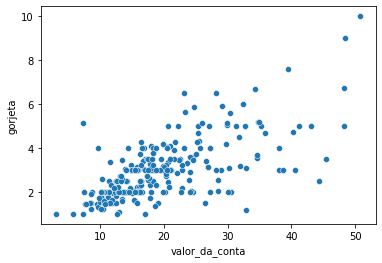

In [21]:
# Plot
#sns.scatterplot(x='valor_da_conta', y='gorjeta', data = gorjeta)

# salvar o plot em uma variavel
plot_valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data = gorjeta)


**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [22]:
print('A base de dados contém {} registros'.format(gorjeta.shape[0]))
print('Registros não nulos')
gorjeta.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo porcentagem

In [23]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [24]:
gorjeta['porcentagem'] = gorjeta['gorjeta'] / gorjeta['valor_da_conta']

In [25]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [26]:
gorjeta['porcentagem'] = gorjeta['porcentagem'].round(2)

In [27]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


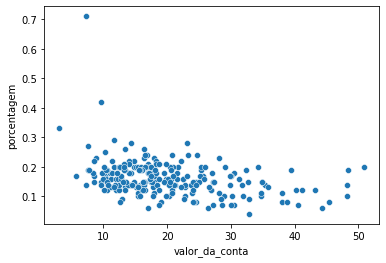

In [28]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjeta)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

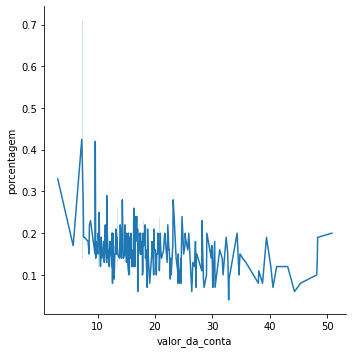

In [29]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjeta)

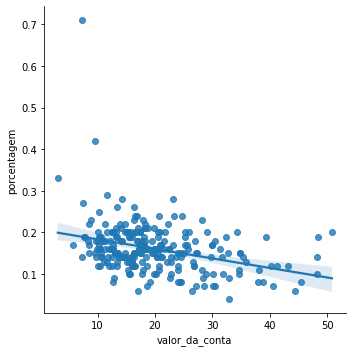

In [30]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjeta)

## Análise Sobremesa

In [31]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [32]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


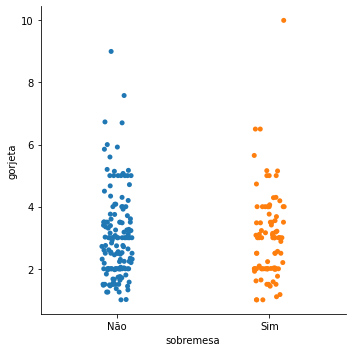

In [33]:
# Pedir sobremesa altera a gorjeta?

sns.catplot(x='sobremesa', y='gorjeta', data = gorjeta)

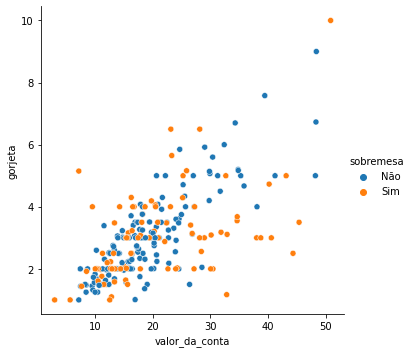

In [34]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data = gorjeta)

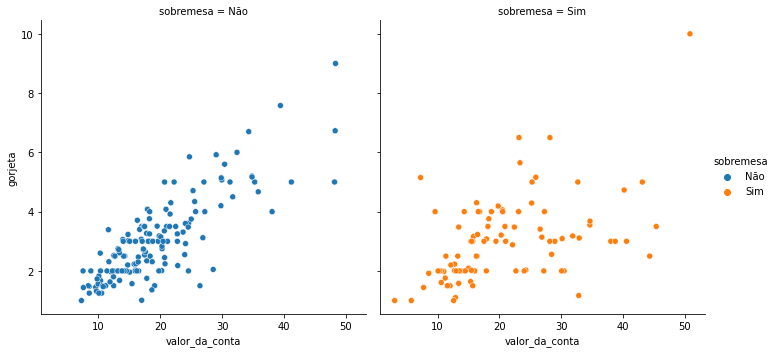

In [35]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data = gorjeta)

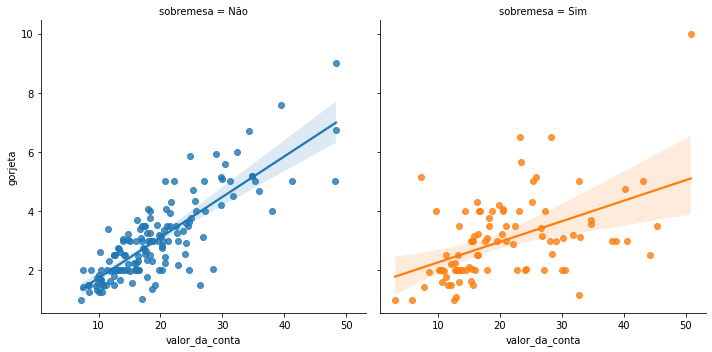

In [36]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjeta)

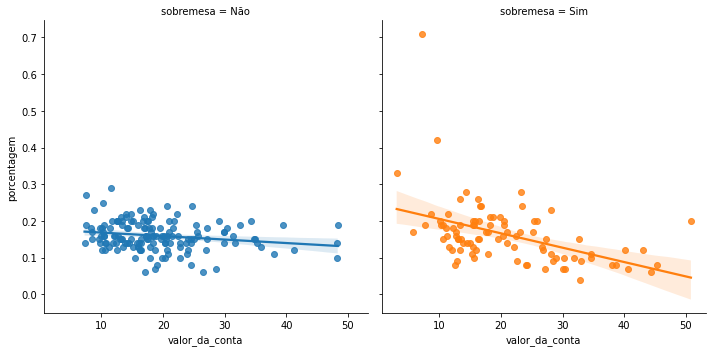

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjeta)

**Visualmente, existe uma diff entre o valor da gorjeta daqueles que pediram ou não sobremesa**

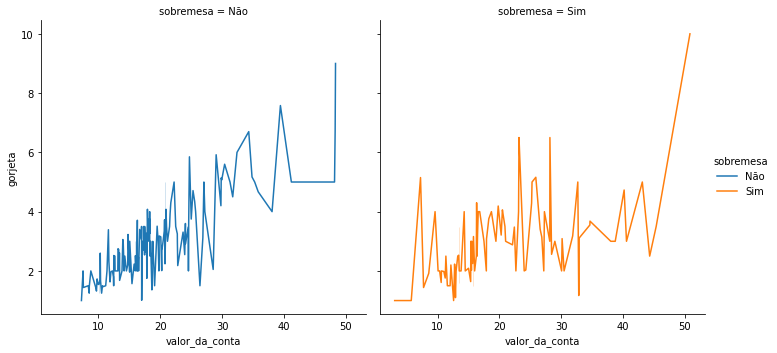

In [38]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data = gorjeta)

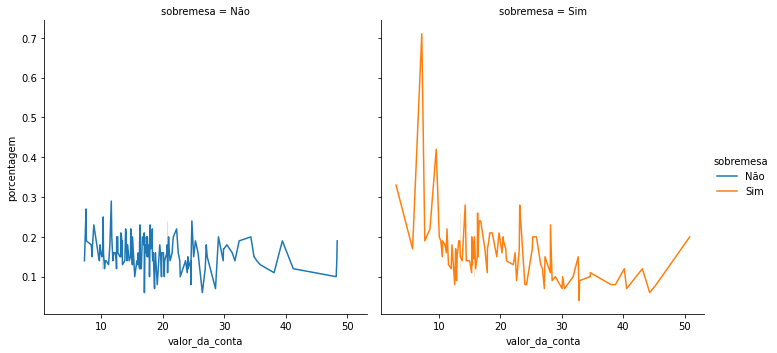

In [39]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data = gorjeta)

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**


**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [40]:
from scipy.stats import ranksums

In [41]:
sobremesa = gorjeta.query("sobremesa == 'Sim'").porcentagem

In [42]:
sem_sobremesa = gorjeta.query("sobremesa == 'Não'").porcentagem

In [43]:
r = ranksums(sobremesa, sem_sobremesa)

Para aceitar a Halt temos que aceitar um pvalue iqual ou menor que 0.05

In [44]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


## Análise semana

In [45]:
gorjeta.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

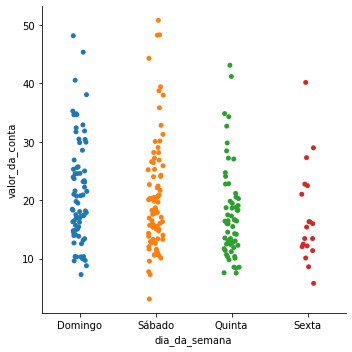

In [46]:
sns.catplot(x='dia_da_semana', y ='valor_da_conta', data=gorjeta)

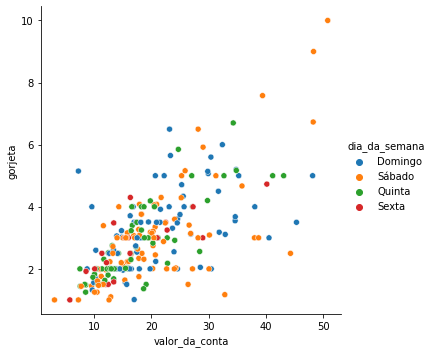

In [47]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjeta)

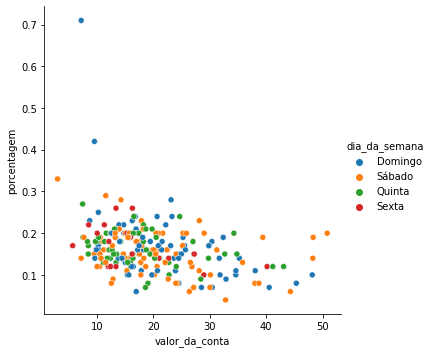

In [48]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjeta)

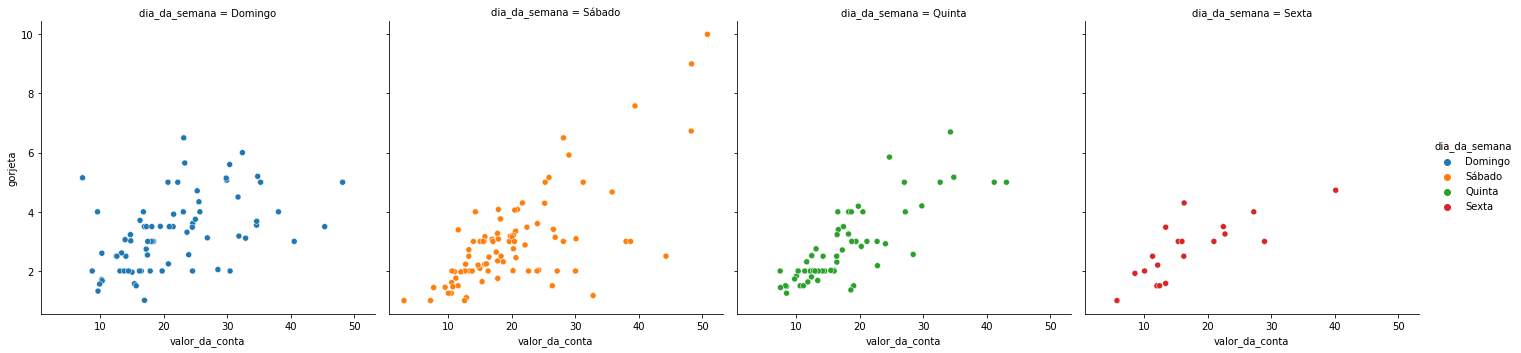

In [49]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjeta)

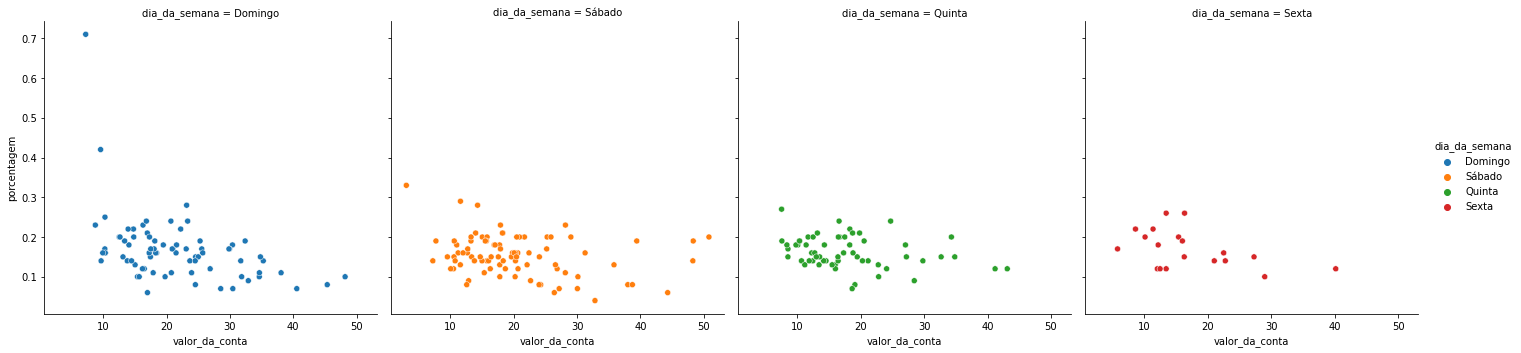

In [52]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjeta)

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjeta)

In [53]:
media_geral = gorjeta.gorjeta.mean()

In [54]:
print("A média geral das gorjetas é de {}".format(media_geral))

A média geral das gorjetas é de 2.99827868852459


In [57]:
gorjeta.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [58]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [61]:
print("Frequência dos dias")
gorjeta.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**


**H<sup>alt</sup>**
> ***A distribuição do valor da conta não é igual no sábado e no domingo**

In [64]:
valor_conta_domingo = gorjeta.query("dia_da_semana == 'Domingo'").valor_da_conta

In [63]:
valor_conta_sabado = gorjeta.query("dia_da_semana == 'Sábado'").valor_da_conta

In [66]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

print("O valor do p-value é {}".format(r2.pvalue))

O valor do p-value é 0.3576728477868443


## Hora da alimentação

In [67]:
gorjeta.head()


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [68]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

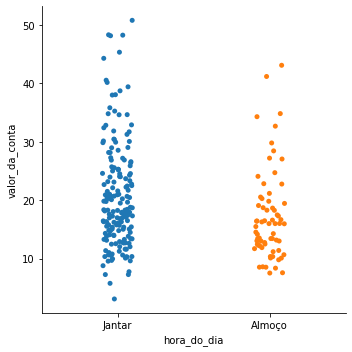

In [69]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

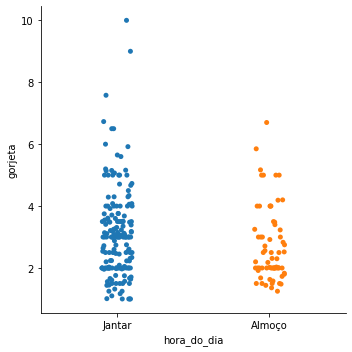

In [70]:
sns.catplot(x='hora_do_dia', y='gorjeta', data=gorjeta)

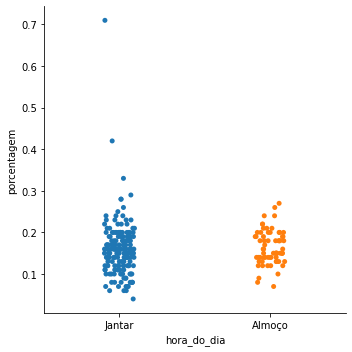

In [71]:
sns.catplot(x='hora_do_dia', y='porcentagem', data=gorjeta)

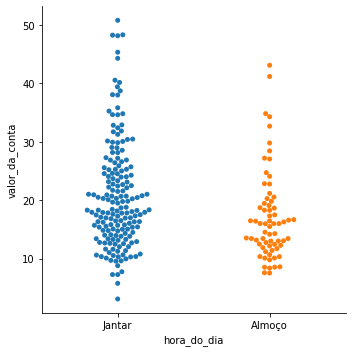

In [72]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjeta)

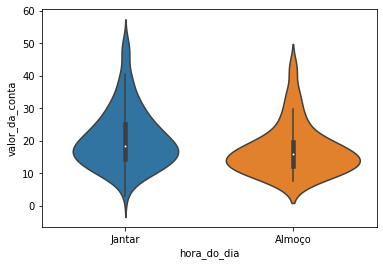

In [73]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

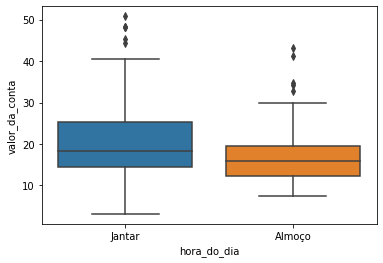

In [74]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

In [80]:
almoco = gorjeta.query("hora_do_dia == 'Almoço'").valor_da_conta

In [85]:
jantar = gorjeta.query("hora_do_dia == 'Jantar'").valor_da_conta

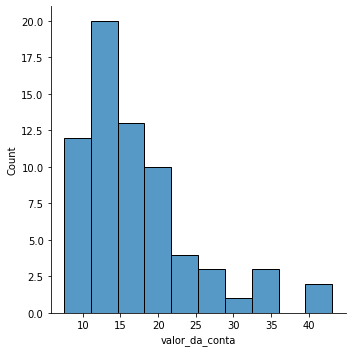

In [81]:
sns.displot(almoco)

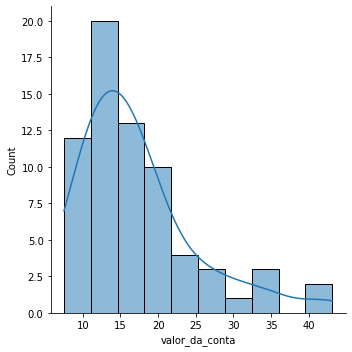

In [82]:
sns.displot(almoco, kde=True)

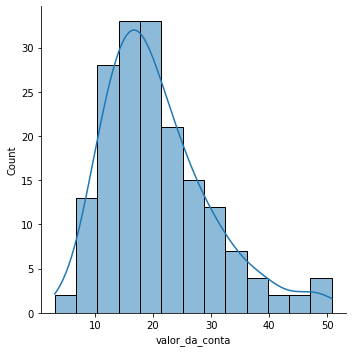

In [86]:
sns.displot(jantar, kde=True)

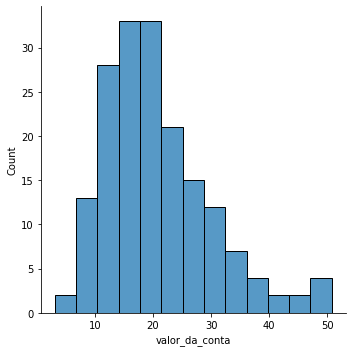

In [87]:
sns.displot(jantar)

In [89]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773
